<a href="https://colab.research.google.com/github/ZenoZoldyck/Recurrent_Nets/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

tf.__version__

'2.5.0'

In [15]:
# time to load dataset
(train_data, train_label), (test_data, test_label) = tf.keras.datasets.imdb.load_data(num_words = 88584)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [16]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 22665,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 21631,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 19193,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 10311,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 31050,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 12118,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5

In [17]:
len(train_data), len(train_label), train_label[0].shape, train_label[0].shape

(25000, 25000, (), ())

In [6]:
train_label[0]

1

In [18]:
# Intresting...each observation is of different length
len(train_data[0]), len(train_data[1])

(218, 189)

In [19]:
# The observations are of different lengths, so we need to make them all same length.
#If greater than 250, then it trims, else pads with zeros on the left.

train_data = tf.keras.preprocessing.sequence.pad_sequences(train_data, 250)
test_data = tf.keras.preprocessing.sequence.pad_sequences(test_data, 250)

In [9]:
len(train_data[0]), len(train_data[1])

(250, 250)

In [20]:
# time for model creation

vocab_size = 88584
model = tf.keras.Sequential([
     tf.keras.layers.Embedding(vocab_size, 32),
     tf.keras.layers.LSTM(32),
     tf.keras. layers.Dense(1, activation = "sigmoid")                        
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          2834688   
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 2,843,041
Trainable params: 2,843,041
Non-trainable params: 0
_________________________________________________________________


In [21]:
# time for some traning

model.compile(loss = tf.keras.losses.binary_crossentropy,
              optimizer = tf.keras.optimizers.RMSprop(),
              metrics = ["accuracy"])

history = model.fit(train_data, train_label, epochs = 10, validation_data = (test_data, test_label))


Epoch 1/10
782/782 [==============================] - 20s 24ms/step - loss: 0.4108 - accuracy: 0.8110 - val_loss: 0.3214 - val_accuracy: 0.8663
Epoch 2/10
782/782 [==============================] - 18s 23ms/step - loss: 0.2427 - accuracy: 0.9075 - val_loss: 0.3381 - val_accuracy: 0.8631
Epoch 3/10
782/782 [==============================] - 18s 23ms/step - loss: 0.1929 - accuracy: 0.9298 - val_loss: 0.2959 - val_accuracy: 0.8784
Epoch 4/10
782/782 [==============================] - 18s 23ms/step - loss: 0.1647 - accuracy: 0.9407 - val_loss: 0.3130 - val_accuracy: 0.8796
Epoch 5/10
782/782 [==============================] - 18s 23ms/step - loss: 0.1427 - accuracy: 0.9505 - val_loss: 0.3277 - val_accuracy: 0.8742
Epoch 6/10
782/782 [==============================] - 18s 23ms/step - loss: 0.1251 - accuracy: 0.9566 - val_loss: 0.3709 - val_accuracy: 0.8676
Epoch 7/10
782/782 [==============================] - 18s 23ms/step - loss: 0.1103 - accuracy: 0.9613 - val_loss: 0.3320 - val_accuracy:

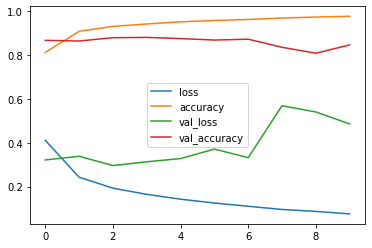

In [22]:
# looks like we have done a great job !!!
pd.DataFrame(history.history).plot()

In [23]:
model.evaluate(test_data, test_label)

782/782 [==============================] - 4s 5ms/step - loss: 0.4853 - accuracy: 0.8455


[0.4853355586528778, 0.84552001953125]